# Wave Equation Testing

The purpose of this code is to test methods associated with assignment 5, wave equations.

In [1]:
# load useful libraries
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

## Task 1

Write a program to calculate the energies as a function of time for the 1-d wave equation with cyclic boundary conditions.

In [50]:
def wave_stepper(u, dt, init_vel = 0, Courant=0.1, nsteps=99, save_stride=9, boundary_hack=False):
    
    
    u_cur = u.copy()
    u_next = 0*u.copy()
    
    # spatial second derivative difference equation assuming 
    # cyclic ("wrap-around") boundaries
    d2u = lambda u: np.roll(u,-1) - 2*u + np.roll(u,+1)
    
    u_last = u_cur - dt*init_vel + 0.5*Courant**2*d2u(u_cur)
    
    result = []
    for n in range(nsteps):
        u_next = 2*u_cur - u_last + Courant**2*d2u(u_cur)
        
        if boundary_hack:
            u_next[0], u_next[-1] = 0, 0
                 
        u_last = u_cur[:]  # previous = current
        u_cur = u_next[:]  # current = next
        
        # save results at every 9th time step for analysis and display
        if (n%save_stride)==0: result.append(u_cur.copy())
    
    result.append(u_cur)
    return result

In [51]:
def wave_solver(u, xstep, tstep, wave_speed=1.0, save_stride=1, boundary_hack=False):
    """ Explicit physical solution of the wave equation.
    """
    
    dt = tstep[1] - tstep[0]
    dx = xstep[1] - xstep[0]
    C = wave_speed * dt / dx
    
    if (C>0.95):
        print('Warning- large Courant number: '+str(C)[0:4])
        
    return wave_stepper(u, dt, Courant = C, nsteps = len(tstep)-1, save_stride=save_stride, boundary_hack=boundary_hack ), C

In [4]:
def even(f, a, b, n):
    
    # Initialize sum and increment amount
    result = 0
    h = (b-a)/n
    
    for i in range(1,(n/2)):
        result += f(h*2*i)

    return result

In [5]:
def odd(f, a, b, n):
    
    # Initialize sum and increment amount
    result = 0
    h = (b-a)/n
    
    for i in range(1,(n/2+1)):
        result += f(h*(2*i-1))
    return result

In [6]:
def simpson(f, a, b, n = 1000):
    """Implementation of Simpson's method of numerical integration
    Returns the approximate integral of f from a to b"""
    
    # Interval widths
    h = (b-a)/n
    
    approx = f(a)+2*even(f, a, b, n)+4*odd(f, a, b, n)+f(b)
    
    return h*approx/3

In [ ]:
def wave_energies(x, t, c, u0):
    
    
    return kin_eng, pot_eng

## Task 2

Calculate and plot the energies for the following parameters:

\begin{align*}
    c &= 0.3 \\
    t &= np.linspace(0.0, 3.0, 999) \\
    x &= np.linspace(0.0, 2.0, 199) \\
    u0 &= np.exp( -((x-0.8)*10)**2 )
\end{align*}

Is total energy conserved?  Discuss.

## Task 3

 The wave_stepper function defaults to using cyclic boundary conditions, but has a keyword option which effectively absorbs waves at the boundaries:

    if boundary_hack:
        u2[0], u2[-1] = 0, 0
   
Modify wave_stepper to include perfectly reflecting boundaries and check whether energy is conserved.

In [35]:
def wave_stepperReflect(u, dt, init_vel = 0, Courant=0.1, nsteps=99, save_stride=9):
    
    
    u_cur = u.copy()
    u_next = 0*u.copy()
    
    # spatial second derivative difference equation assuming 
    # cyclic ("wrap-around") boundaries
    d2u = lambda u: np.roll(u,-1) - 2*u + np.roll(u,+1)
    
    u_last = u_cur - dt*init_vel + 0.5*Courant**2*d2u(u_cur)
    
    # Apply free boundary conditions
    u_next[0] = -u_last[0]+2*u_cur[0]+2*Courant**2*(u_cur[1]-u_cur[0])
    u_next[-1] = -u_last[-1]+2*u_cur[-1]+2*Courant**2*(u_cur[-2]-u_cur[-1])
    
    
    result = []
    for n in range(nsteps):
        u_next = 2*u_cur - u_last + Courant**2*d2u(u_cur)
        
        # Apply free boundary conditions
        u_next[0] = -u_last[0]+2*u_cur[0]+2*Courant**2*(u_cur[1]-u_cur[0])
        u_next[-1] = -u_last[-1]+2*u_cur[-1]+2*Courant**2*(u_cur[-2]-u_cur[-1])
                 
        u_last = u_cur[:]  # previous = current
        u_cur = u_next[:]  # current = next
        
        # save results at every 9th time step for analysis and display
        if (n%save_stride)==0: result.append(u_cur.copy())
    
    result.append(u_cur)
    return result

## Optional 

It is interesting to simulate a standing wave on [0,L] and determine the error in the simulation as a function of time and location. Any choices for  𝐴  and  𝑚  should work, but simple values (ie.  𝐴=1  and  𝑚=1 ) might be best.

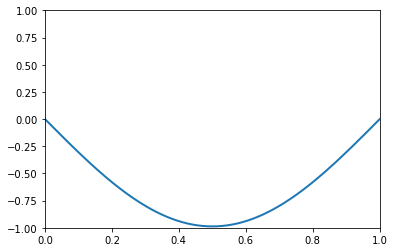

In [53]:
# Standing wave

# Constants
A = 1.0
m = 1.0
L = 1.0

xstep = np.linspace(0.0, L, 199)
tstep = np.linspace(0.0, 3.0, 999)
I = lambda x: A*np.sin(np.pi*m*x/L)
u = A*np.sin(np.pi*m*xstep/L)
yy, C = wave_solver(u, xstep, tstep, wave_speed=1.0, save_stride=20, boundary_hack=True)
#yy = np.array(yy).T

xx,tt = np.meshgrid( xstep, t )

fig, axes = plt.subplots()
axes.set_xlim(0,1)
axes.set_ylim(-1,1)
line, = axes.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):

    line.set_data(xstep,yy[i])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, 
                               blit=True)

HTML(anim.to_jshtml())

## Testing

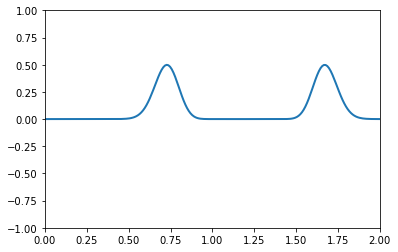

In [36]:
x = np.linspace(0.0, 2.0, 199)
y0 = np.exp( -((x-0.8)*10)**2 )
nsteps=999

yy = wave_stepperReflect(y0, 0.01, Courant=0.25, nsteps=nsteps, save_stride=20) #False)
xx, my = np.meshgrid( x, np.arange(len(yy)) )
#print( len(yy), yy[0].shape, x.shape )

fig, axes = plt.subplots()
axes.set_xlim(0,2)
axes.set_ylim(-1,1)
line, = axes.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):

    line.set_data(x,yy[i])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, 
                               blit=True)

HTML(anim.to_jshtml())